# Creating a new probe file

To create a new probe file, we can use `ProbeInterface`
(a subpackage of `SpikeInterface`). If you haven't already, you will need to
run `pip install spikeinterface[full]` to install the package. You will also
need `matplotlib` if you want to visualize the probe geometry (recommended).

First, we'll follow some steps from a `ProbeInterface` tutorial to create a 
custom Probe object, then we'll demonstrate how to export the Probe to a
Kilosort4-compatible format.

##### Generate a Probe from scratch
from [probeinterface.readthedocs.io](https://probeinterface.readthedocs.io/en/main/examples/ex_01_generate_probe_from_sratch.html)

First, let’s create dummy positions for a 24-contact probe

In [1]:
import numpy as np

from probeinterface import Probe
from probeinterface.plotting import plot_probe


# Genenerate 3 columns of 8 contacts each, 20um apart vertically and horizontally
n = 24
positions = np.zeros((n, 2))
for i in range(n):
    x = i // 8
    y = i % 8
    positions[i] = x, y
positions *= 20
positions[8:16, 1] -= 10

print(positions)

[[  0.   0.]
 [  0.  20.]
 [  0.  40.]
 [  0.  60.]
 [  0.  80.]
 [  0. 100.]
 [  0. 120.]
 [  0. 140.]
 [ 20. -10.]
 [ 20.  10.]
 [ 20.  30.]
 [ 20.  50.]
 [ 20.  70.]
 [ 20.  90.]
 [ 20. 110.]
 [ 20. 130.]
 [ 40.   0.]
 [ 40.  20.]
 [ 40.  40.]
 [ 40.  60.]
 [ 40.  80.]
 [ 40. 100.]
 [ 40. 120.]
 [ 40. 140.]]


Now we can create a Probe object  and set the position and shape of each contact

The ndim argument indicates that the contact is 2d, so the positions have a (n_elec, 2) shape.  We can also define a 3d probe with ndim=3 and positions will have a (n_elec, 3) shape.

Note: shapes and shape_params could be arrays as well, indicating the shape for each contact separately.

In [2]:
probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 5})

In addition to contacts, we can create the planar contour (polygon) of the probe

In [3]:
polygon = [(-20, -30), (20, -110), (60, -30), (60, 190), (-20, 190)]
probe.set_planar_contour(polygon)

If `matplotlib` is installed, the Probe can be easily plotted:

(<matplotlib.collections.PolyCollection at 0x259ade41df0>,
 <matplotlib.collections.PolyCollection at 0x259adec15b0>)

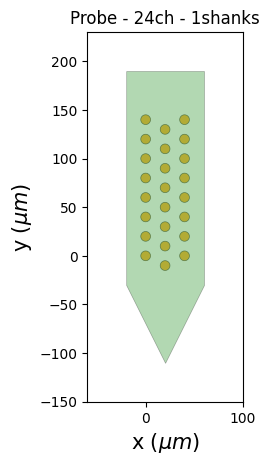

In [4]:
plot_probe(probe)

##### Export probe information

`ProbeInterface` supports a few different probe formats
[(see documentation here)](https://probeinterface.readthedocs.io/en/main/examples/ex_06_import_export_to_file.html),
but the relevant one for Kilosort compatibility is .prb. We can use the following
steps to export the probe to that format, and then use it in Kilosort.


In [7]:
from probeinterface import ProbeGroup, write_prb

# Multiple probes can be added to a ProbeGroup. We only have one, but a
# ProbeGroup wrapper is still necessary for `write_prb` to work.
pg = ProbeGroup()
pg.add_probe(probe)
# Must set channel indices for .prb files.
# Indicate "not connected" contacts with a value of -1.
probe.set_device_channel_indices(np.arange(24))
# CHANGE THIS PATH to wherever you want to save your probe file.
write_prb('.../test_prb.prb', pg)   


Now Kilsort4 can load the probe file and extract the contact coordinates and other relevant information. There are two ways to provide this information when running Kilosort4:

1. Specify the path to the probe file in the GUI.

Or

2. Load the probe using `kilosort.io.load_probe` and provide the resulting dictionary to `kilosort.run_kilosort` using the `probe` keyword argument (demonstrated below).

In [8]:
from kilosort.io import load_probe

p = load_probe('.../test_prb.prb')
print(p)

{'chanMap': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]), 'xc': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20., 20., 20., 20., 20.,
       20., 20., 20., 40., 40., 40., 40., 40., 40., 40., 40.],
      dtype=float32), 'yc': array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., -10.,  10.,  30.,
        50.,  70.,  90., 110., 130.,   0.,  20.,  40.,  60.,  80., 100.,
       120., 140.], dtype=float32), 'kcoords': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32), 'n_chan': 24}


In [ ]:
from kilosort import run_kilosort
# Abreviated arguments, for demonstration only.
results = run_kilosort(..., probe=p)